In [1]:
import numpy as np

# Chapter Two - Introduction to NumPy

    Fancy Indexing
    Sorting Arrays
    Structured Daya: Numpy's Structed Arrays

## Fancy Indexing

**Fancy indexing** is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars.

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.

In [2]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the *shape of the index arrays* rather than the shape of the array being indexed:

In [5]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col] #selects [0,2], [1,1], and [2,3]

array([ 2,  5, 11])

otice that the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]. 

If we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [11]:
print(row[:, np.newaxis])
print('')
print(col)
X[row[:, np.newaxis], col]

[[0]
 [1]
 [2]]

[2 1 3]


array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.

It is always important to remember with fancy indexing that the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

We can combine fancy and simple indices:

In [15]:
print('row index 2: ', X[2,:])
X[2, [2, 0, 1]] #row at index 2, value at col index 2, 0 and then 1

row index 2:  [ 8  9 10 11]


array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [16]:
print('row index 1 to the end: ', X[1:,:])
X[1:, [2, 0, 1]] #selects row from index 1 on, values at the col index 2, 0 and then 1

row index 1 to the end:  [[ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 6,  4,  5],
       [10,  8,  9]])

And we can combine fancy indexing with masking:

In [18]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] #rows at index 0, 1, and 2, with a mask of True for cols at index 0, and 2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Example: Selecting Random Point

One commons use of fancy indexing is the selection of subsets of rows from a matrix. For example we might have an $NxD$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution.

In [19]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

We can visualize these points as a scatter-plot:

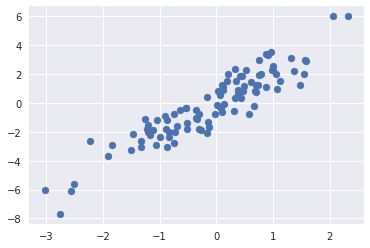

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [22]:
indicies = np.random.choice(X.shape[0], 20, replace = False)
indicies

array([88, 34, 93, 86, 78, 49,  2, 32, 60, 84, 42, 82, 29, 25, 72, 77, 47,
       13, 30, 11])

In [23]:
selection = X[indicies]
selection.shape

(20, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

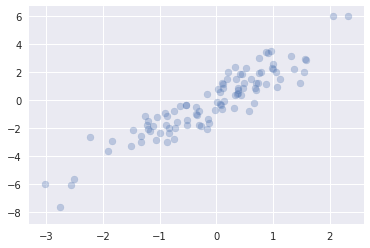

In [24]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [25]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

In [26]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

 Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x.

So what if you want the other behavior where the operation is repeated? For this, you can use the **at()** method of ufuncs

In [27]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like **np.histogram** and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

## Sorting Arrays

In [28]:
def selection_sort(x):
    """finds minimum value of a list
    makes swaps until list is sorted"""
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i]) #tuple swap
    return x

In [29]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

Selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays. For a list of $N$ values, it requires $N$ loops, each of which does on order $∼N$ comparisons to find the swap value. In terms of the "big-O" notation, selection sort averages $O(N^{2})$.

bogosort is actually the worse (insert Obama joke here), sorting on pure chance.

In [31]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]): #while any of the list backwards is bigger than the list forwards
        np.random.shuffle(x) #shuffle the list and try again
    return x

In [34]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Fortunately, Python contains built-in sorting algorithms that are much more efficient than either of the simplistic algorithms just shown. We'll start by looking at the Python built-ins, and then take a look at the routines included in NumPy and optimized for NumPy arrays.

Although Python has built-in sort and sorted functions to work with lists, we won't discuss them here because NumPy's **np.sort** function turns out to be much more efficient and useful for our purposes. 

By default **np.sort** uses an $O[Nlog(N)]$, *quicksort* algorithm, though *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.

### A quick aside about these sort methods
    Because it's a little interesting
    
The quick sort uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage. As a trade-off, however, it is possible that the list may not be divided in half. When this happens, we will see that performance is diminished.

A quick sort first selects a value, which is called the pivot value.

The actual position where the pivot value belongs in the final sorted list, commonly called the split point, will be used to divide the list for subsequent calls to the quick sort.

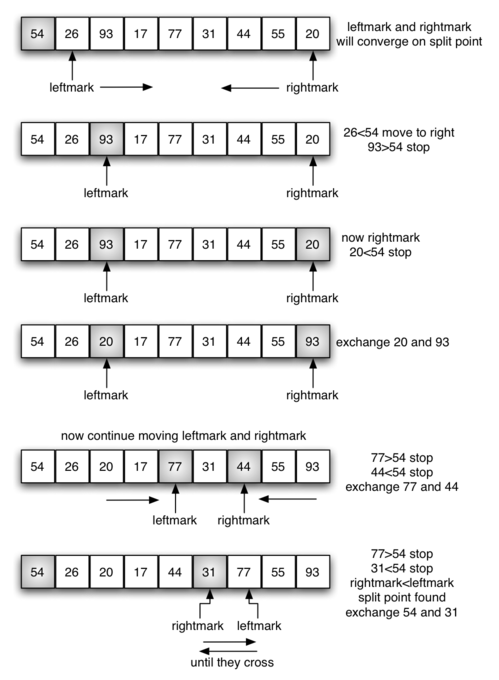

Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item, we split the list and recursively invoke a merge sort on both halves. Once the two halves are sorted, the fundamental operation, called a merge, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted, new list. 

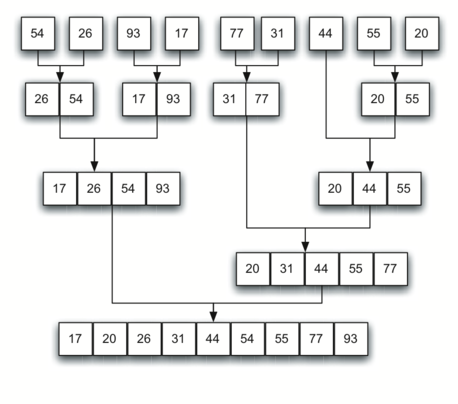

### Back to NumPy

To return a sorted version of the array without modifying the input, you can use **np.sort**:

In [35]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

If you prefer to sort the array in-place, you can instead use the sort method of arrays:

In [36]:
x.sort()
print(x)

[1 2 3 4 5]


A related function is argsort, which instead returns the indices of the sorted elements:

In [37]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. 

In [39]:
#using fancy indexing to construct the sorted array
x[i]

array([1, 2, 3, 4, 5])

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [40]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [41]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [42]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost! *I'm not sure when this would actually be useful.*

Sometimes we're not interested in sorting the entire array, but simply want to find the $k$ smallest values in the array. NumPy provides this in the **np.partition** function. np.partition takes an array and a number $K$; the result is a new array with the smallest $K$ values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [44]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. **Within the two partitions, the elements have arbitrary order.**

### Example: k-Nearest Neighbors

We'll start by creating a random set of 10 points on a two-dimensional plane. Using the standard convention, we'll arrange these in a 10×2 array:

In [45]:
X = rand.rand(10,2)

In [46]:
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

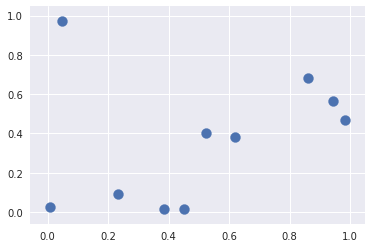

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

Now we'll compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension; using the efficient broadcasting and aggregation routines provided by NumPy we can compute the matrix of square distances in a single line of code:

In [48]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

When you come across code like this, it can be useful to break it down into its component steps:

In [51]:
print(X[:, np.newaxis, :].shape)
print('')
print(X[np.newaxis, :, :].shape)

(10, 1, 2)

(1, 10, 2)


In [49]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [52]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [53]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero:

In [55]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [56]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k+1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function:

In [57]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In [59]:
nearest_partition[:,:2] #2 nearest neighbors of each

array([[3, 0],
       [1, 4],
       [2, 1],
       [3, 9],
       [1, 8],
       [5, 8],
       [6, 8],
       [7, 9],
       [8, 5],
       [3, 9]])

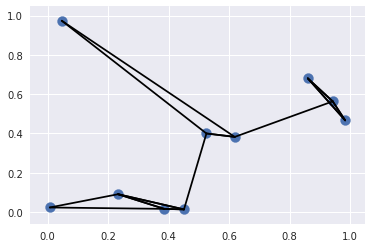

In [60]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

Although the broadcasting and row-wise sorting of this approach might seem less straightforward than writing a loop, it turns out to be a very efficient way of operating on this data in Python. 

The beauty of this approach is that it's written in a way that's agnostic to the size of the input data: we could just as easily compute the neighbors among 100 or 1,000,000 points in any number of dimensions, and the code would look the same.

## Structured Data: NumPy's Structured Arrays

This section demonstrates the use of NumPy's **structured arrays** and **record arrays**, which provide efficient storage for compound, heterogeneous data. While the patterns shown here are useful for simple operations, scenarios like this often lend themselves to the use of Pandas Dataframes

We can create a **structured array** using a compound data type specification:

In [61]:
#use compund data type for structures arrays

data = np.zeros(4, dtype = {'names': ('name', 'age', 'weight'),
                           'formats': ('U10', 'i4', 'f8')})


Ccreated an array where we specifcy essentially the column name and the type of data we would see in the column

Here 'U10' translates to "Unicode string of maximum length 10," 'i4' translates to "4-byte (i.e., 32 bit) integer," and 'f8' translates to "8-byte (i.e., 64 bit) float." 

In [62]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25,  55. ) ('Bob', 45,  85.5) ('Cathy', 37,  68. )
 ('Doug', 19,  61.5)]


The handy thing with structured arrays is that you can now refer to values either by index or by name:

In [63]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], 
      dtype='<U10')

In [64]:
data[0]

('Alice', 25,  55.)

In [68]:
data[-1]['name']

'Doug'

In [72]:
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], 
      dtype='<U10')

In [75]:
#A compound type can also be specified as a list of tuples:

data_dtype = np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

In [76]:
data = np.zeros(4, dtype = data_dtype)

In [77]:
data

array([(b'', 0,  0.), (b'', 0,  0.), (b'', 0,  0.), (b'', 0,  0.)], 
      dtype=[('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [78]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[(b'Alice', 25,  55. ) (b'Bob', 45,  85.5) (b'Cathy', 37,  68. )
 (b'Doug', 19,  61.5)]


It is possible to define even more advanced compound types. For example, you can create a type where each element contains an array or matrix of values. Here, we'll create a data type with a mat component consisting of a 3×33×3 floating-point matrix:

In [79]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3,3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


Now each element in the X array consists of an id and a 3×3 matrix. Why would you use this rather than a simple multidimensional array, or perhaps a Python dictionary? The reason is that this **NumPy dtype directly maps onto a C structure definition**, so the buffer containing the array content can be accessed directly within an appropriately written C program. 

*If you find yourself writing a Python interface to a legacy C or Fortran library that manipulates structured data, you'll probably find structured arrays quite useful!*

NumPy also provides the **np.recarray** class, which is almost identical to the structured arrays just described, but with one additional feature: fields can be accessed as attributes rather than as dictionary keys.

In [80]:
#So, instead of 
data['age']

array([25, 45, 37, 19], dtype=int32)

In [81]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

The downside is that for record arrays, there is some extra overhead involved in accessing the fields, even when using the same syntax. 